# Team members

| Id        | Student                                 |
|-----------|-----------------------------------------|
| A01795654 | Raul Astorga Castro                     |
| A01795579 | Edson Misael Astorga Castro             |
| A01373679 | Luis Miguel Balderas González de Burgos |
| A01730466 | Sinaí Avalos Rivera                     |
| A01410682 | Carlos Miguel Arvizu Durán              |

# TC 5033
## Word Embeddings

<br>

## Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



## Import files and libraries required for the model training

### Libraries

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

## Load GloVe file

### GloVe 6B 50D Word Embeddings
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [33]:
# Path of GloVe file to read
PATH = '/Users/raulastrga/Library/Mobile Documents/com~apple~CloudDocs/Maestría/Advanced Machine Learning Methods/MNA/AMLM/Activity_3a/glove.6B.50d.txt'

In [34]:
def create_emb_dictionary(path):
    """
    Reads a GloVe text file and creates a dictionary of word embeddings.

    This function reads a GloVe file where each line contains a word 
    followed by its embedding values. The output is a dictionary where 
    each key is a word and each value is a list of floats representing 
    the embedding for that word.

    Parameters:
    ----------
    path : str
        The file path to the GloVe .txt file.

    Returns:
    -------
    dict
        A dictionary where keys are words (str) and values are lists of floats
        representing the word embeddings.
    """
    # Initialize an empty dictionary to store word embeddings
    dict_glove={}

    # Open the GloVe file in read mode with UTF-8 encoding
    with open(path, 'r', encoding='utf8') as file:
            # Iterate over each line in the GloVe file
            for line in file:
                # Split the line by whitespace to separate the word and its embedding values
                split_line = line.split()

                # The first element in split_line is the word
                word = split_line[0]

                # The remaining elements are the embedding values for the word, converted to floats
                embedding = list(split_line[1:])

                # Store the word and its embedding vector in the dictionary
                dict_glove[word] = embedding

    # Return the dictionary containing word-embedding pairs
    return dict_glove

In [35]:
# Create dictionary of word embeddings of previuos GloVe file path
embeddings_dict = create_emb_dictionary(PATH)

### Serialize dictionary

In [36]:
# Serialize the dictionary to a file in binary format using pickle
# for efficient reuse without reloading from the GloVe file each time.
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

### Deserialize dictionary

In [37]:
# Deserialize the embeddings dictionary from the pickle file
# This step loads the dictionary back into memory, allowing access
# to the embeddings without parsing the original GloVe text file.
#with open('embeddings_dict_50D.pkl', 'rb') as f:
#    embeddings_dict = pickle.load(f)

### Print some embeddings

In [38]:
def show_n_first_words(path, n_words):
        """
        Displays the first 'n_words' from a GloVe file, including each word and the 
        length of its embedding vector.

        This function reads the GloVe file line by line, displaying each word 
        along with the length of its embedding vector (i.e., the number of dimensions).
        It stops once 'n_words' words have been displayed.

        Parameters:
        ----------
        path : str
            The file path to the GloVe .txt file.
        n_words : int
            The number of words to display from the GloVe file.
        """
        # Open the GloVe file in read mode
        with open(path, 'r') as f:
            # Iterate over each line, with index 'i' tracking the current line number
            for i, line in enumerate(f):
                # Split the line into the word and its embedding values, and print them
                print(line.split(), len(line.split()[1:])) # Display word, embedding, and vector length

                # Stop displaying once 'n_words' lines have been printed
                if i>=n_words: break

In [39]:
# Printing first 5 lines of GloVe file
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

## Plot some embeddings

In [40]:
def plot_embeddings(words2show, embeddings_dict, func = PCA):
    """
    Plots the 2D projection of word embeddings using dimensionality reduction.

    This function takes a list of words, retrieves their embeddings from a dictionary,
    and reduces their dimensionality using a specified method (e.g., PCA). 
    It then plots the reduced embeddings on a 2D scatter plot and labels each point 
    with its corresponding word.

    Parameters:
    ----------
    words2show : list of str
        A list of words to display in the plot.
    embeddings_dict : dict
        A dictionary with words as keys and their embeddings (lists of floats) as values.
    func : class, optional
        A dimensionality reduction class with a fit_transform method, default is PCA. 
        Other options include TSNE or other scikit-learn compatible reduction classes.
    """
    # Initialize a list to hold the embeddings for the specified words
    X=[]

    # Collect the embeddings for each word in 'words2show' from the embeddings dictionary
    for word in words2show:
        X.append(embeddings_dict[word])
        
    # Apply dimensionality reduction to project the embeddings to 2D
    transform=func(n_components=2)
    X_reduced=transform.fit_transform(np.asarray(X))

    # Set up the plot dimensions and size
    plt.figure(figsize=(10,5))
    
    # Plot each word's reduced embedding as a point and add a label
    for i, word in enumerate(words2show):
        x,y = X_reduced[i]
        plt.scatter(x,y) # Plot the point for the word's embedding
        plt.annotate(word,(x,y), fontsize=8) # Label the point with the word
        
    # Label the axes and add a title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

    

In [41]:
# Define a list of words to plot, this variety of words can help illustrate semantic relationships within different categories.
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets. By finding new “principal components” that capture the most variance in the data, PCA reduces the number of features while retaining as much information as possible.

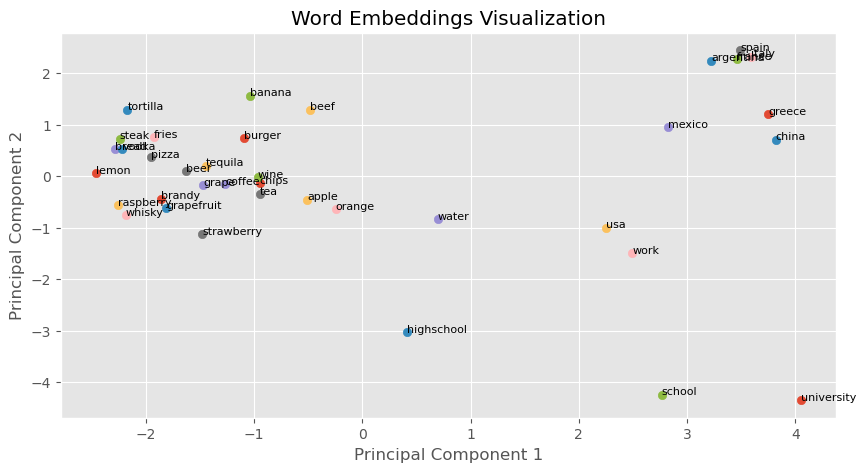

In [42]:
# Plot the embeddings of the selected words, reducing the embedding dimensions to 2D using PCA.
# This will create a scatter plot where each point represents a word and its relative position
# to other words based on the embeddings, with points labeled accordingly.
plot_embeddings(words, embeddings_dict, PCA)

### t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique primarily used for visualizing high-dimensional data. Unlike PCA, which focuses on preserving global structure, t-SNE emphasizes local relationships, meaning it groups similar points close together in the lower-dimensional space.

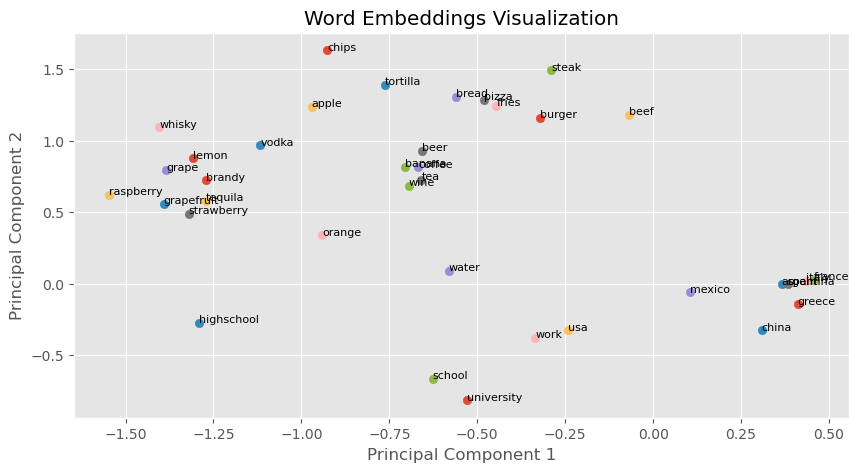

In [43]:
# Plot the embeddings of the selected words using t-SNE for dimensionality reduction.
embeddings = plot_embeddings(words, embeddings_dict, TSNE)

## Let us compute analogies

### Analogy

This function finds the word (from the embeddings dictionary) that best completes the analogy based on cosine similarity. For example, given "king is to queen as man is to ?", it should return "woman".

In [44]:
def analogy(word1, word2, word3, embeddings_dict):
    """
    Solves an analogy problem of the form "word1 is to word2 as word3 is to ?".

    Parameters:
    ----------
    word1 : str
        The first word in the analogy pair.
    word2 : str
        The second word in the analogy pair, representing the target for word1.
    word3 : str
        The third word in the analogy, for which we are seeking a related word.
    embeddings_dict : dict
        A dictionary containing word embeddings with words as keys and embedding vectors as values.

    Returns:
    -------
    str
        The word that best completes the analogy.
    """
    # Convert the embeddings for word1, word2, and word3 to numpy arrays
    emb_a=np.asarray(embeddings_dict[word1], dtype=np.float32)
    emb_b=np.asarray(embeddings_dict[word2], dtype=np.float32)
    emb_c=np.asarray(embeddings_dict[word3], dtype=np.float32)

    # Initialize variables to store the best word and the maximum cosine similarity
    words = embeddings_dict.keys()
    max_cosine_sim = -999              
    best_word = None

    # Iterate over each word in the embeddings dictionary
    for w in words:        
        # Skip the input words (word1, word2, word3) to avoid trivial matches
        if w in [word1, word2, word3] :
            continue

        # Calculate vector differences: u represents the analogy direction, and v the test direction
        u=emb_b - emb_a
        v=np.asarray(embeddings_dict[w], dtype=np.float32) - emb_c
        
        # Calculate cosine similarity between u and v
        dot = np.dot(u,v) # Dot product of u and v
        norm_u = np.linalg.norm(u) # L2 norm of u
        norm_v = np.linalg.norm(v) # L2 norm of v
        cosine_sim = dot/(norm_u * norm_v) # Compute cosine similarity
        
        # Update best word if a higher cosine similarity is found
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        
    # Return the word that best completes the analogy
    return best_word

### Solving the analogy

In [45]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

### Similarity

This function computes the cosine similarity between the embedding of the target word and each word in the embeddings dictionary, ranking the results to find the closest matches.

In [46]:
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Finds the top N most similar words to a given word based on cosine similarity.

    Parameters:
    ----------
    word : str
        The target word for which similar words are sought.
    embeddings_dict : dict
        A dictionary containing word embeddings with words as keys and 
        embedding vectors as values.
    top_n : int, optional
        The number of most similar words to return (default is 10).

    Returns:
    -------
    list of tuples
        A list of tuples, each containing a similar word and its cosine similarity 
        score, sorted in descending order of similarity.
    """
    # Define the target word and initialize a dictionary to hold similarity scores
    word_tarjet=word
    similar={}

    # Convert the target word's embedding to a numpy array
    u=np.asarray(embeddings_dict[word_tarjet], dtype=np.float32)
    
    # Calculate cosine similarity between the target word and each word in the embeddings
    for word in embeddings_dict.keys():     
        # Convert the current word's embedding to a numpy array
        v=np.asarray(embeddings_dict[word], dtype=np.float32)
        
        # Calculate cosine similarity
        dot = np.dot(u, v)  # Dot product of target and current word embeddings
        norm_u = np.linalg.norm(u)  # L2 norm of the target word embedding
        norm_v = np.linalg.norm(v)  # L2 norm of the current word embedding
        cosine_sim = dot / (norm_u * norm_v)  # Compute cosine similarity

        # Store the word and its cosine similarity score in the dictionary
        similar[word] = cosine_sim
        
    # Sort words by similarity score in descending order and exclude the target word itself
    sorted_similar = sorted(similar.items(), key=lambda x: x[1], reverse=True)

    # Return the top N most similar words, excluding the target word (first in the sorted list)
    return sorted_similar[1:top_n+1] 

### Finding the most similar

In [47]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [48]:
# Iterate through the list of similar words and print each one with its rank.
# 'i' represents the rank, and 'w[0]' is the word (excluding the similarity score).
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
